Table of contents
    Libraries
    Functions
    EDA
    Training KMeans
        Age and Spending Score
        Annual Income and spending Score

Let's analyze data from mall customers to dig intuitions about customer convergence and apply KMeans algorithm to develop insights about how to deal with different clusters. 

## Libraries

In [1]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Functions

The set of functions in this implementation includes:
    * format_spines();
    * count_plot();
    * compute_square_distances();
    * plot_elbow_method();
    * plot_kmeans();

Each one with its set of parameters.

In [2]:
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    this function sets up borders from an axis and personalize colors
    input:
        ax: figure axis
        right_border: flag to determine if the right border will be visible or not"""
    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')


def count_plot(feature, df, colors='Blues_d', hue=False):
    """docstring for count_plot:
    this function plots data setting up frequency and percentage. This algo sets up borders
    and personalization
    input:
        feature: feature to be plotted
        df: dataframe
        colors = color palette (default=Blues_d)
        hue = second feature analysis (default=False)"""
    
    # Preparing variables
    ncount = len(df)
    fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)
        
    plt.show()

def compute_square_distances(df, Kmin=1, Kmax=12):
    """docstring for compute_square_distances
    this function computes the square distance of KMeans algorithm through the number of
    clusters in range Kmin and Kmax
    input:
        df: dataframe
        Kmin: min index of K analysis
        Kmax: max index of K analysis"""
    
    square_dist = []
    K = range(Kmin, Kmax)
    for k in K:
        km = KMeans(n_clusters=k)
        km.fit(df)
        square_dist.append(km.inertia_)
    return K, square_dist

def plot_elbow_method(df, Kmin=1, Kmax=12):
    """docstring for plot_elbow_method
    this function computes the square distances and plots the elbow method for best cluster
    number analysis
    input:
        df: dataframe
        Kmin: min index of K analysis
        Kmax: max index of K analysis"""
    
    # Computing distances
    K, square_dist = compute_square_distances(df, Kmin, Kmax)
    
    # Plotting elbow method
    fig, ax = plt.subplots()
    ax.plot(K, square_dist, 'bo-')
    format_spines(ax, right_border=False)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Square Dist')
    plt.title(f'Elbow Method - {df.columns[0]} and {df.columns[1]}', size=14)
    plt.show()
    
def plot_kmeans(df, y_kmeans, centers):
    """docstring for plotKMeans
    this function plots the result of a KMeans training
    input:
        df: dataframe
        y_kmeans: kmeans prediction
        centers: cluster centroids"""
    
    # Setting up and plotting
    X = df.values
    sns.set(style='white', palette='muted', color_codes=True)
    fix, ax = plt.subplots(figsize=(14, 7))
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    ax.set_title('KMeans Applied', size=14)
    ax.set_xlabel(f'{df.columns[0]}', size=12, labelpad=5)
    ax.set_ylabel(f'{df.columns[1]}', size=12, labelpad=5)
    format_spines(ax, right_border=False)
    plt.show()

## EDA

In [3]:
# Reading data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Dims
df.shape

(200, 5)

In [5]:
# Communication
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset has 200 rows and 5 columns.


In [6]:
# Null data
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Some statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

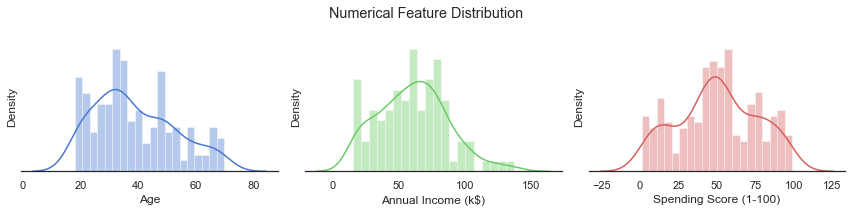

In [9]:
# Numerical features distribution
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(df['Age'], bins=20, ax=axs[0])
axs[1] = sns.distplot(df['Annual Income (k$)'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(df['Spending Score (1-100)'], bins=20, ax=axs[2], color='r')

fig.suptitle('Numerical Feature Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

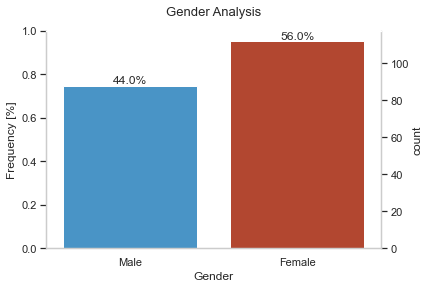

In [10]:
# Counting gender
custom_colors = ["#3498db", "#C8391A"]
count_plot(feature='Gender', df=df, colors=custom_colors)

Let's create a age category for future analysis.

In [11]:
# Looking at age values
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [12]:
# Creating new category
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,Young
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,Adult
4,5,Female,31,17,40,Adult


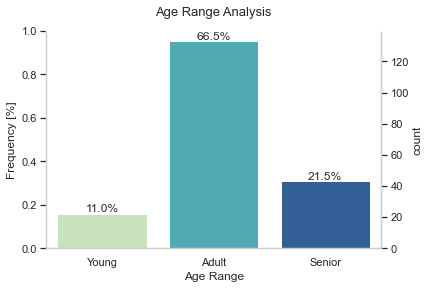

In [13]:
# Result
count_plot(feature='Age Range', df=df, colors='YlGnBu')

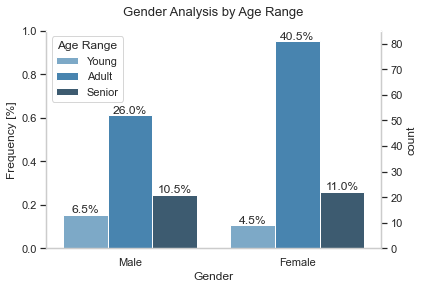

In [14]:
# Gender by Age Range
count_plot(feature='Gender',df=df, hue='Age Range')

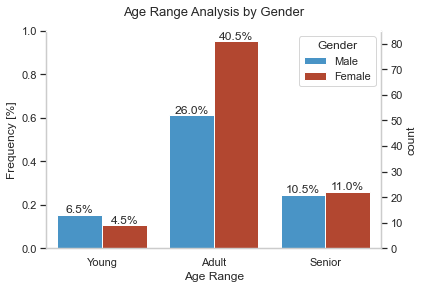

In [15]:
# Maybe the inverse would be more clear
count_plot(feature='Age Range', df=df, colors=custom_colors, hue='Gender')

C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


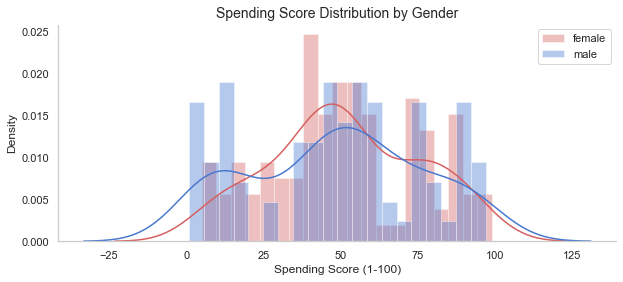

In [16]:
# Spending Score Distribution
fig, ax = plt.subplots(figsize=(10, 4), sharex=True)
female = df.loc[df['Gender'] == 'Female']
male = df.loc[df['Gender'] == 'Male']
ax = sns.distplot(female['Spending Score (1-100)'], bins=20, label='female', 
                  color='r')
ax = sns.distplot(male['Spending Score (1-100)'], bins=20, label='male')
ax.set_title('Spending Score Distribution by Gender', size=14)
format_spines(ax, right_border=False)
plt.legend()
plt.show()

C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


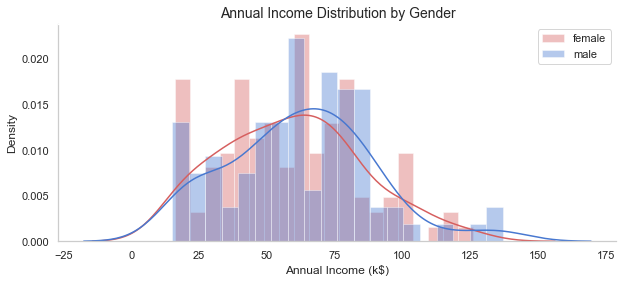

In [17]:
# Annual Income Distribution
fig, ax = plt.subplots(figsize=(10, 4), sharex=True)
female = df.loc[df['Gender'] == 'Female']
male = df.loc[df['Gender'] == 'Male']
ax = sns.distplot(female['Annual Income (k$)'], bins=20, label='female', 
                  color='r', hist=True)
ax = sns.distplot(male['Annual Income (k$)'], bins=20, label='male')
ax.set_title('Annual Income Distribution by Gender', size=14)
format_spines(ax, right_border=False)
plt.legend()
plt.show()

**Conclusions:**
The analysis shows there is low score concentration in male gender (between 0 and 25 score points). In female gender, we have high concentration in ranges between 75 and 100 compared to male gender. In general, women have higher Spending Score than men.

In other hand, the Annual Income distribution shows that in general, men have higher annunal income than women. These two analysi together could give good insights for mall administrators.

C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

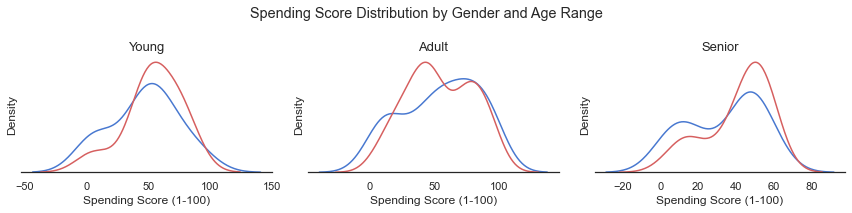

In [18]:
# Configuration
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)

# Dataframe indexing
young = df.loc[df['Age Range'] == 'Young']
adult = df.loc[df['Age Range'] == 'Adult']
senior = df.loc[df['Age Range'] == 'Senior']
titles = ['Young', 'Adult', 'Senior']
age_range_dataframes = [young, adult, senior]

for idx in range(3):
    age_range = age_range_dataframes[idx]
    axs[idx] = sns.distplot(age_range[age_range['Gender']=='Male']['Spending Score (1-100)'], 
                          bins=20, ax=axs[idx], label='male', color='b', hist=False)
    axs[idx] = sns.distplot(age_range[age_range['Gender']=='Female']['Spending Score (1-100)'], 
                          bins=20, ax=axs[idx], label='female', color='r', hist=False)
    axs[idx].set_title(titles[idx], size=13)

fig.suptitle('Spending Score Distribution by Gender and Age Range')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gunja\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

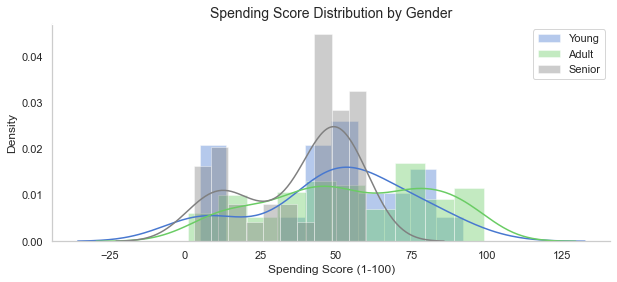

In [19]:
# Spending Score Distribution by Age Range
fig, ax = plt.subplots(figsize=(10, 4), sharex=True)
young = df.loc[df['Age Range'] == 'Young']
adult = df.loc[df['Age Range'] == 'Adult']
senior = df.loc[df['Age Range'] == 'Senior']
ax = sns.distplot(young['Spending Score (1-100)'], bins=10, label='Young', color='b')
ax = sns.distplot(adult['Spending Score (1-100)'], bins=10, label='Adult', color='g')
ax = sns.distplot(senior['Spending Score (1-100)'], bins=10, label='Senior', color='grey')
ax.set_title('Spending Score Distribution by Gender', size=14)
format_spines(ax, right_border=False)
plt.legend()
plt.show()

**Conclusions:**
* Senior Spending Scores concentrates in low and medium values;
* In high score valuation, adults have the highest levels;
* In gender comparison, young and senior women have higher Spending Score values than young and senior men.

## Training KMeans

### Age and Spending Score

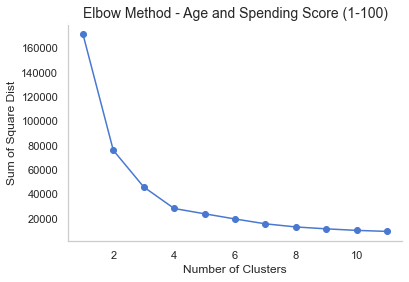

In [20]:
# Indexing dataframe
df_1 = df.loc[:, ['Age', 'Spending Score (1-100)']]

# Searching for optimun K
plot_elbow_method(df_1)

Let's train our algorithm with 4 clusters.

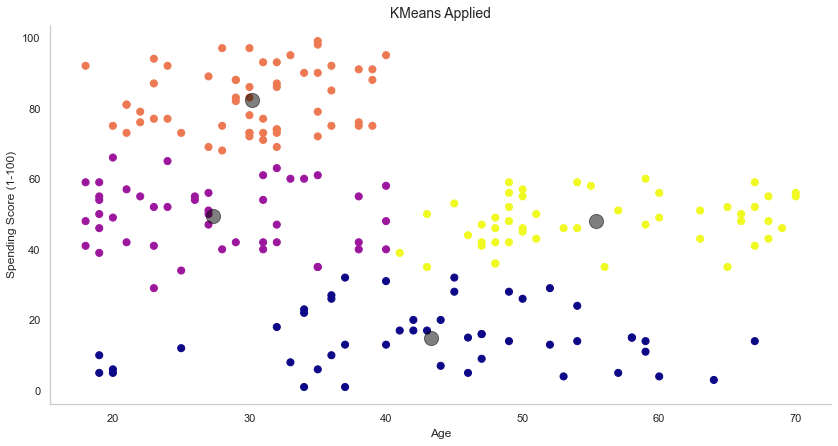

In [21]:
# Training KMeans
k_means = KMeans(n_clusters=4)
k_means.fit(df_1)
y_kmeans = k_means.predict(df_1)
centers = k_means.cluster_centers_
plot_kmeans(df_1, y_kmeans, centers)

**Analysis:**
Now we have 4 different clusters grouped by `Age` and `Spending Score`.

* **Group 1: Yellow** - Here we have customers with low score no matter the age. For this group, maybe the mall adminstrators have develop a different strategy including effective marketing action and a different approach to give a new perspective for these costumers. So the score could be raised for higher levels.
* **Group 2: Purple** - This group identifies young and adult costumers (age < 40) with medium scores (between 35 and 75). To raise the Spending Score of this group, maybe would be good to create new actions for young public like games, customized products and others.
* **Group 3: Orange** - These costumers have age greater than 40 and medium score. Similar to group 2, for raising the score of group 3 the mall administrators could improve actions for adult and senior public like calm places inside the mall, new restaurants, typical food, and others.
* **Group 4: Dark Blue** - These are costumers with the highest Spending Score. The actions of mall administrators should be planned to maintain this group with high scores. The challenge is to understand what are the most important mall features for them and improve it.

### Annual Income and Spending Score

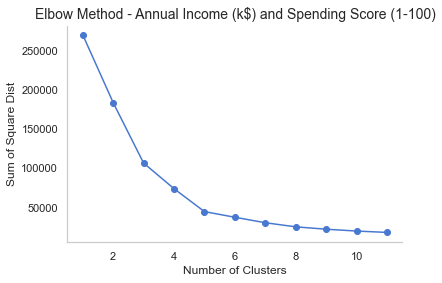

In [22]:
# Dataframe indexing
df_2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]

# Optimum K
plot_elbow_method(df_2)

Let's run KMeans with 5 clusters.

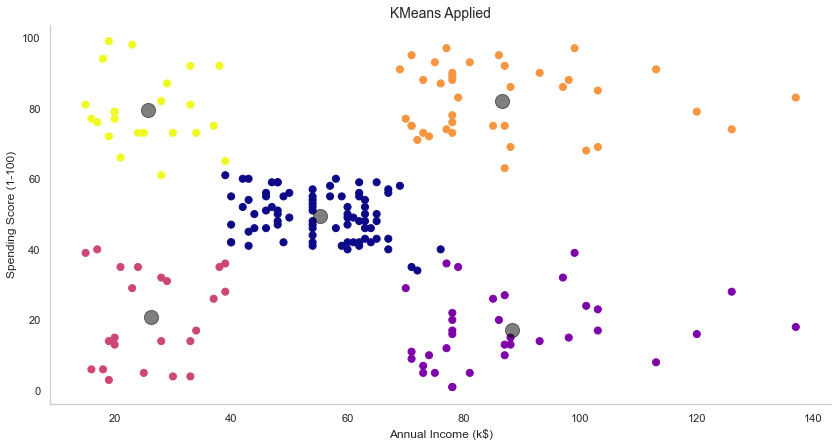

In [23]:
# Training
k_means = KMeans(n_clusters=5)
k_means.fit(df_2)
y_kmeans = k_means.predict(df_2)
centers = k_means.cluster_centers_
plot_kmeans(df_2, y_kmeans, centers)

Here we have analysis between Annual Income and Spending Score. There is 5 differente group, each one with specific characteristics.

There are costumers with high, medium and low annual income and with high, medium and low spending score. For each one, the administrators could plan different actions.